## Model 1: Anomaly Detection through PCA model

### 🎯 Why We Use PCA for Fault Detection

1. Think of your 52 sensor features as 52 different musicians playing in an orchestra. When everything is "normal," they play in harmony. This "harmony" is a complex pattern, but it's a pattern.
2. PCA is a tool that finds the most important patterns in complex data.
3. Learns "Normal": We first train PCA only on the "normal" (fault-free) data. PCA listens to the orchestra and learns the "normal song" (the main patterns and relationships between the 52 sensors). It learns this "song" so well that it can summarize it in just a few "principal components" (like the main melody and harmony) instead of needing all 52 individual parts.
4. Detects "Abnormal": When a fault occurs, one or more musicians (sensors) starts playing the wrong notes. This new data no longer fits the "normal song" that PCA learned.
When we ask PCA to "reconstruct" this new, faulty data using only the normal patterns it knows, it does a bad job. The difference between the actual faulty data and PCA's reconstructed version is called the "reconstruction error."
5. Normal data -> Fits the patterns -> Low reconstruction error.
6. Faulty data -> Doesn't fit the patterns -> High reconstruction error.
7. By setting a threshold on this error, we create an anomaly detector.

In [1]:
#Load dataset faultfree training
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib.inline
import seaborn as sns

X_train  = pd.read_csv('fault_free_training.csv')
X_train.head()



,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
0,0,1,1,0.25038,3674.0,4529.0,9.2320,26.889,42.402,2704.3,...,53.744,24.657,62.544,22.137,39.935,42.323,47.757,47.510,41.258,18.447
1,0,1,2,0.25109,3659.4,4556.6,9.4264,26.721,42.576,2705.0,...,53.414,24.588,59.259,22.084,40.176,38.554,43.692,47.427,41.359,17.194
2,0,1,3,0.25038,3660.3,4477.8,9.4426,26.875,42.070,2706.2,...,54.357,24.666,61.275,22.380,40.244,38.990,46.699,47.468,41.199,20.530
3,0,1,4,0.24977,3661.3,4512.1,9.4776,26.758,42.063,2707.2,...,53.946,24.725,59.856,22.277,40.257,38.072,47.541,47.658,41.643,18.089
4,0,1,5,0.29405,3679.0,4497.0,9.3381,26.889,42.650,2705.1,...,53.658,28.797,60.717,21.947,39.144,41.955,47.645,47.346,41.507,18.461


In [2]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 55 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   faultNumber    250000 non-null  int64  
 1   simulationRun  250000 non-null  int64  
 2   sample         250000 non-null  int64  
 3   xmeas_1        250000 non-null  float64
 4   xmeas_2        250000 non-null  float64
 5   xmeas_3        250000 non-null  float64
 6   xmeas_4        250000 non-null  float64
 7   xmeas_5        250000 non-null  float64
 8   xmeas_6        250000 non-null  float64
 9   xmeas_7        250000 non-null  float64
 10  xmeas_8        250000 non-null  float64
 11  xmeas_9        250000 non-null  float64
 12  xmeas_10       250000 non-null  float64
 13  xmeas_11       250000 non-null  float64
 14  xmeas_12       250000 non-null  float64
 15  xmeas_13       250000 non-null  float64
 16  xmeas_14       250000 non-null  float64
 17  xmeas_15       250000 non-nul

In [3]:
#missing values
X_train.isnull().sum()

faultNumber      0
simulationRun    0
sample           0
xmeas_1          0
xmeas_2          0
xmeas_3          0
xmeas_4          0
xmeas_5          0
xmeas_6          0
xmeas_7          0
xmeas_8          0
xmeas_9          0
xmeas_10         0
xmeas_11         0
xmeas_12         0
xmeas_13         0
xmeas_14         0
xmeas_15         0
xmeas_16         0
xmeas_17         0
xmeas_18         0
xmeas_19         0
xmeas_20         0
xmeas_21         0
xmeas_22         0
xmeas_23         0
xmeas_24         0
xmeas_25         0
xmeas_26         0
xmeas_27         0
xmeas_28         0
xmeas_29         0
xmeas_30         0
xmeas_31         0
xmeas_32         0
xmeas_33         0
xmeas_34         0
xmeas_35         0
xmeas_36         0
xmeas_37         0
xmeas_38         0
xmeas_39         0
xmeas_40         0
xmeas_41         0
xmv_1            0
xmv_2            0
xmv_3            0
xmv_4            0
xmv_5            0
xmv_6            0
xmv_7            0
xmv_8            0
xmv_9       

In [4]:
X_train.head()

,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
0,0,1,1,0.25038,3674.0,4529.0,9.2320,26.889,42.402,2704.3,...,53.744,24.657,62.544,22.137,39.935,42.323,47.757,47.510,41.258,18.447
1,0,1,2,0.25109,3659.4,4556.6,9.4264,26.721,42.576,2705.0,...,53.414,24.588,59.259,22.084,40.176,38.554,43.692,47.427,41.359,17.194
2,0,1,3,0.25038,3660.3,4477.8,9.4426,26.875,42.070,2706.2,...,54.357,24.666,61.275,22.380,40.244,38.990,46.699,47.468,41.199,20.530
3,0,1,4,0.24977,3661.3,4512.1,9.4776,26.758,42.063,2707.2,...,53.946,24.725,59.856,22.277,40.257,38.072,47.541,47.658,41.643,18.089
4,0,1,5,0.29405,3679.0,4497.0,9.3381,26.889,42.650,2705.1,...,53.658,28.797,60.717,21.947,39.144,41.955,47.645,47.346,41.507,18.461


In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

# 1. Load your NORMAL training data (e.g., 'fault_free_training.csv')
# Assume 'X_train' is a pandas DataFrame with your 52 sensor features.
# X_train = ...

# 2. Scale the data
# This is critical for PCA.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)



In [6]:
X_train_scaled

array([[ 0.        , -1.72859016, -1.72859016, ..., -0.1651346 ,
         0.28419196,  0.22429427],
       [ 0.        , -1.72859016, -1.72166195, ..., -0.19568846,
         0.47094673, -0.63177032],
       [ 0.        , -1.72859016, -1.71473373, ..., -0.18059559,
         0.17509758,  1.6474248 ],
       ...,
       [ 0.        ,  1.72859016,  1.71473373, ...,  0.25378457,
         0.66694679,  0.83713541],
       [ 0.        ,  1.72859016,  1.72166195, ...,  0.30863427,
        -2.34701637,  0.26870305],
       [ 0.        ,  1.72859016,  1.72859016, ...,  0.33771565,
        -0.05233645, -1.33957792]], shape=(250000, 55))

In [7]:
# 3. Initialize and train the PCA model
# We'll tell PCA to keep 95% of the original variance (information).
# It will automatically choose the number of components needed.
pca = PCA(n_components=0.95)

# Train the model *only* on normal, scaled data
pca.fit(X_train_scaled)

print(f"PCA kept {pca.n_components_} components to explain 95% of the variance.")



PCA kept 37 components to explain 95% of the variance.


Visualizing what the PCA model learned...


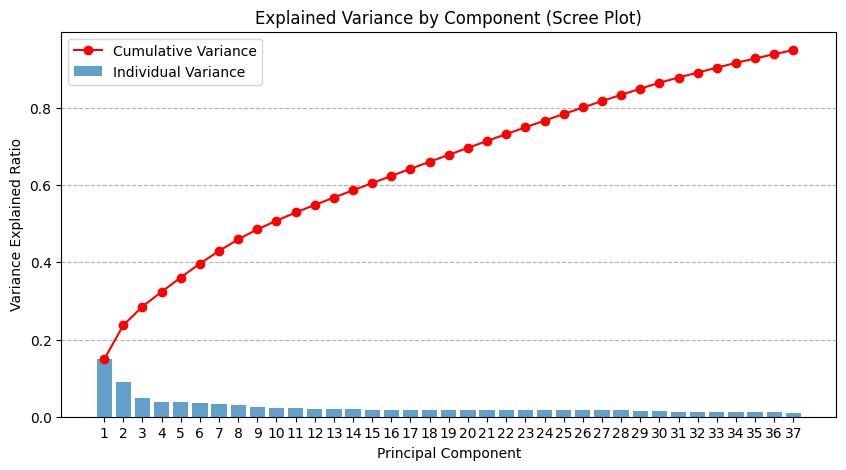

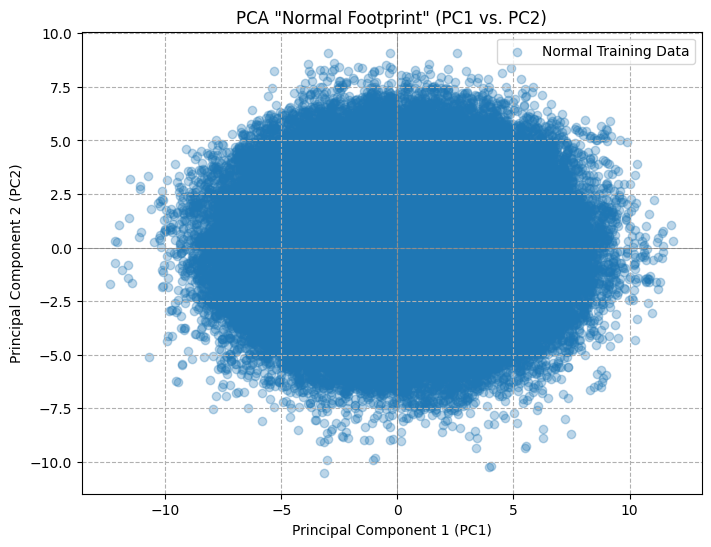

In [8]:
# --- VISUALIZATION 1: What PCA Learned (Insert after Step 3) ---

print("Visualizing what the PCA model learned...")

# Plot 1a: Explained Variance (Scree Plot)
# This shows how much information (variance) each component holds
plt.figure(figsize=(10, 5))
explained_variance_ratio = pca.explained_variance_ratio_
components = np.arange(1, len(explained_variance_ratio) + 1)

plt.bar(components, explained_variance_ratio, alpha=0.7, label='Individual Variance')
plt.plot(components, np.cumsum(explained_variance_ratio), 'r-o', label='Cumulative Variance')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained Ratio')
plt.title('Explained Variance by Component (Scree Plot)')
plt.xticks(components) # Ensure x-axis shows 1, 2, 3...
plt.legend()
plt.grid(axis='y', linestyle='--')
plt.show()


# Plot 1b: "Normal Footprint" (PC1 vs. PC2)
# This shows what "normal" data looks like in the new PCA dimensions
# We need to transform the training data to plot it
X_train_pca = pca.transform(X_train_scaled)

plt.figure(figsize=(8, 6))
# We plot only the first two components for a 2D view
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], alpha=0.3, label='Normal Training Data')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.title('PCA "Normal Footprint" (PC1 vs. PC2)')
plt.grid(linestyle='--')
plt.axhline(0, color='grey', lw=0.5)
plt.axvline(0, color='grey', lw=0.5)
plt.legend()
plt.show()

In [ ]:
# 4. Load new data (e.g., 'faulty_testing.csv')
# Assume 'X_test' has new sensor readings.
X_test = pd.read_csv('faulty_testing.csv')

X_test = X_test.iloc[:225000,:] #I have splitted the dataset feel free not to do so and test whole dataset with ~9600000 rows.


In [12]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225000 entries, 0 to 224999
Data columns (total 55 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   faultNumber    225000 non-null  int64  
 1   simulationRun  225000 non-null  int64  
 2   sample         225000 non-null  int64  
 3   xmeas_1        225000 non-null  float64
 4   xmeas_2        225000 non-null  float64
 5   xmeas_3        225000 non-null  float64
 6   xmeas_4        225000 non-null  float64
 7   xmeas_5        225000 non-null  float64
 8   xmeas_6        225000 non-null  float64
 9   xmeas_7        225000 non-null  float64
 10  xmeas_8        225000 non-null  float64
 11  xmeas_9        225000 non-null  float64
 12  xmeas_10       225000 non-null  float64
 13  xmeas_11       225000 non-null  float64
 14  xmeas_12       225000 non-null  float64
 15  xmeas_13       225000 non-null  float64
 16  xmeas_14       225000 non-null  float64
 17  xmeas_15       225000 non-nul

In [13]:
# 5. Scale the new data using the *same* scaler from training
X_test_scaled = scaler.transform(X_test)

# 6. Reconstruct the data
# First, transform it into PCA's components
X_test_pca = pca.transform(X_test_scaled)

# Then, transform it back to the original 52-sensor space
X_test_reconstructed = pca.inverse_transform(X_test_pca)

Calculating anomaly threshold and visualizing detections...
Anomaly threshold set at: 0.1277


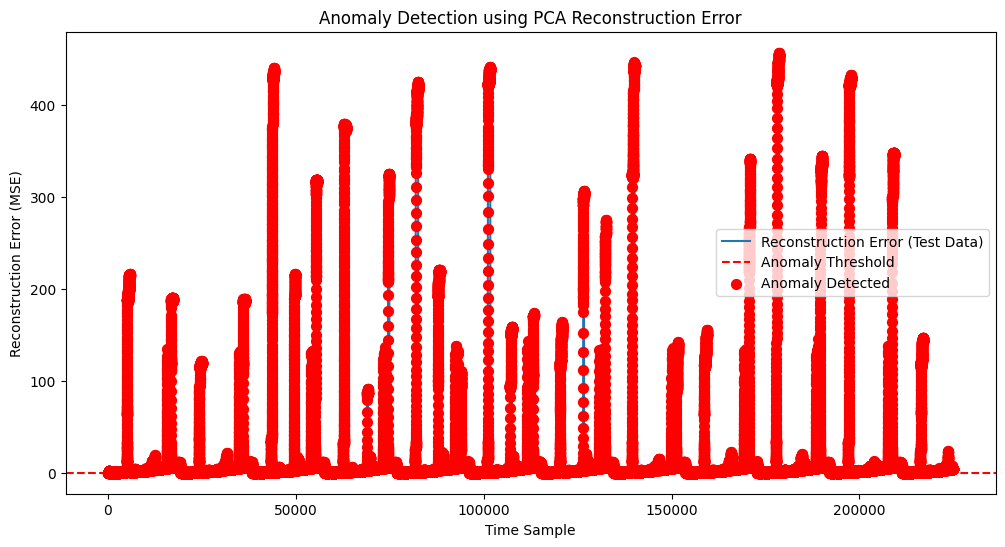

Total anomalies detected: 221783


In [14]:
# --- VISUALIZATION 2: Detecting Anomalies (Replace your Step 7) ---

print("Calculating anomaly threshold and visualizing detections...")

# First, we must calculate the error for the TRAINING data
# to establish a "normal" error threshold.
X_train_reconstructed = pca.inverse_transform(pca.transform(X_train_scaled))
training_errors_per_sample = np.mean(np.square(X_train_scaled - X_train_reconstructed), axis=1)

# Set the anomaly threshold (e.g., mean + 3 standard deviations)
# You can also use: threshold = np.max(training_errors_per_sample)
threshold = np.mean(training_errors_per_sample) + 3 * np.std(training_errors_per_sample)
print(f"Anomaly threshold set at: {threshold:.4f}")

# Now, calculate the reconstruction error for EACH SAMPLE in the TEST data
# (Your X_test_scaled and X_test_reconstructed are from Step 5 & 6)
test_errors_per_sample = np.mean(np.square(X_test_scaled - X_test_reconstructed), axis=1)

# Create a time index for plotting
time_index = np.arange(len(test_errors_per_sample))

# Plot the reconstruction error over time
plt.figure(figsize=(12, 6))
plt.plot(time_index, test_errors_per_sample, label='Reconstruction Error (Test Data)', zorder=1)
plt.axhline(y=threshold, color='r', linestyle='--', label='Anomaly Threshold')

# Highlight the anomalies (where error > threshold)
anomalies = test_errors_per_sample > threshold
plt.scatter(time_index[anomalies], test_errors_per_sample[anomalies], 
            color='red', s=50, zorder=2, label='Anomaly Detected')

plt.title('Anomaly Detection using PCA Reconstruction Error')
plt.xlabel('Time Sample')
plt.ylabel('Reconstruction Error (MSE)')
plt.legend()
plt.show()

print(f"Total anomalies detected: {np.sum(anomalies)}")

### RESULTS: So out of total 960000 entries in faulty_test data PCA model which had to detect 100% data to be abnormal only detected only 9464090 faults and flagged other 136000 entries to be normal. Is the model inaccurate? No. Maybe the simulation data in the test set ran normally below the defined error threshold (Anomaly threshold set at: 0.1277) for sometime in beginning (136000 runs) and as soon as faults went above the threshold, PCA modle flagged it as anomalies.

## Model 2: Fault Diagnosis using Multiclassification Model

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
# --- 1. Load the Labeled Training Data ---
# We use 'faulty_training.csv', which contains labeled samples
# for all 21 classes (Fault 0 through Fault 20).
try:
    df = pd.read_csv('faulty_training.csv')
    print("Successfully loaded 'faulty_training.csv'")
    print(f"Data has {df.shape[0]} samples and {df.shape[1]} columns.")
except FileNotFoundError:
    print("Error: 'faulty_training.csv' not found.")
    print("Please make sure this file is in the same directory.")
    # Exit or raise error if you want to stop the script
    # For this example, we'll stop if the file isn't found.
    exit()

Successfully loaded 'faulty_training.csv'
Data has 5000000 samples and 55 columns.


In [ ]:
df = df.iloc[:100000,:] #Again splitting daatset into just 100000 values since 5000000 is too much for model training, use whole values for GPU. 

In [27]:
#Missing values check
df.isnull().sum()

faultNumber      0
simulationRun    0
sample           0
xmeas_1          0
xmeas_2          0
xmeas_3          0
xmeas_4          0
xmeas_5          0
xmeas_6          0
xmeas_7          0
xmeas_8          0
xmeas_9          0
xmeas_10         0
xmeas_11         0
xmeas_12         0
xmeas_13         0
xmeas_14         0
xmeas_15         0
xmeas_16         0
xmeas_17         0
xmeas_18         0
xmeas_19         0
xmeas_20         0
xmeas_21         0
xmeas_22         0
xmeas_23         0
xmeas_24         0
xmeas_25         0
xmeas_26         0
xmeas_27         0
xmeas_28         0
xmeas_29         0
xmeas_30         0
xmeas_31         0
xmeas_32         0
xmeas_33         0
xmeas_34         0
xmeas_35         0
xmeas_36         0
xmeas_37         0
xmeas_38         0
xmeas_39         0
xmeas_40         0
xmeas_41         0
xmv_1            0
xmv_2            0
xmv_3            0
xmv_4            0
xmv_5            0
xmv_6            0
xmv_7            0
xmv_8            0
xmv_9       

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 55 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   faultNumber    100000 non-null  int64  
 1   simulationRun  100000 non-null  int64  
 2   sample         100000 non-null  int64  
 3   xmeas_1        100000 non-null  float64
 4   xmeas_2        100000 non-null  float64
 5   xmeas_3        100000 non-null  float64
 6   xmeas_4        100000 non-null  float64
 7   xmeas_5        100000 non-null  float64
 8   xmeas_6        100000 non-null  float64
 9   xmeas_7        100000 non-null  float64
 10  xmeas_8        100000 non-null  float64
 11  xmeas_9        100000 non-null  float64
 12  xmeas_10       100000 non-null  float64
 13  xmeas_11       100000 non-null  float64
 14  xmeas_12       100000 non-null  float64
 15  xmeas_13       100000 non-null  float64
 16  xmeas_14       100000 non-null  float64
 17  xmeas_15       100000 non-null

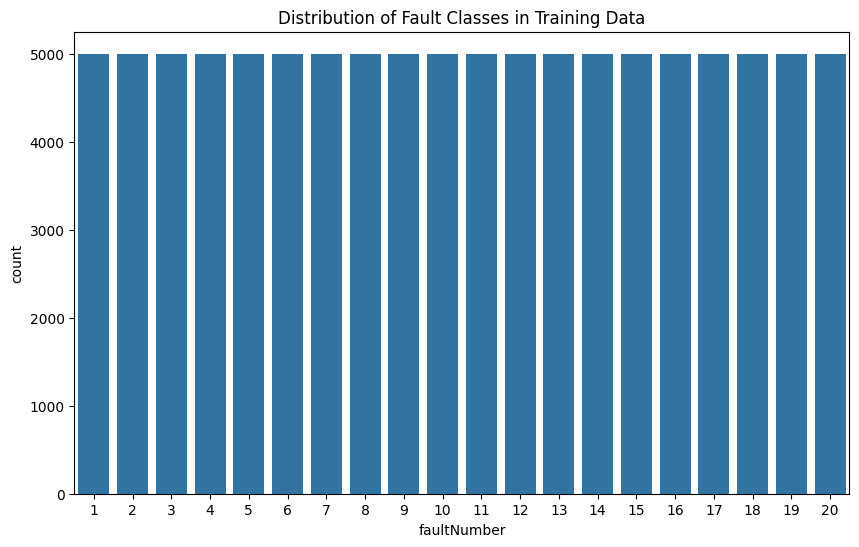

In [29]:
#Checking the balancedness of data against target variable "faultNumber"
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='faultNumber')
plt.title('Distribution of Fault Classes in Training Data')
plt.show()

### So above data almost perfectly balanced

In [30]:
# --- 2. Define Features (X) and Target (y) ---
# The target (y) is the 'faultNumber' column
y = df['faultNumber']

# The features (X) are all sensor/manipulated variables.
# We drop the non-feature columns.
X = df.drop(['faultNumber', 'simulationRun', 'sample'], axis=1)

print(f"\nFeatures (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")


Features (X) shape: (100000, 52)
Target (y) shape: (100000,)


### Now we split our training data into training and validation set since for testing our model we do have a separate dataset

In [31]:
# --- 3. Create a Training and Validation Split ---
# We split our 'faulty_training.csv' data to validate the model.
# This is NOT the final test file.
# stratify=y is CRITICAL: It ensures each fault class is 
# proportionally represented in both the train and validation sets.
X_train, X_val, y_train, y_val = train_test_split(
    X, y, 
    test_size=0.3,    # 70% train, 30% validation
    random_state=42,  # For reproducible results
    stratify=y        # Crucial for imbalanced data
)

print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Validation set size: {X_val.shape[0]} samples")


Training set size: 70000 samples
Validation set size: 30000 samples


In [32]:
# --- 4. Create a Model Pipeline ---
# This is the best practice. A pipeline automatically:
# 1. Scales the data (StandardScaler)
# 2. Feeds it to the model (RandomForestClassifier)
print("\nCreating model pipeline...")
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestClassifier(
        n_estimators=100,  # 100 trees is a good start
        random_state=42,
        n_jobs=-1         # Use all available CPU cores
    ))
])


Creating model pipeline...


In [33]:
# --- 5. Train the Model ---
print("Training the Random Forest model... (This may take a few minutes)")
# The pipeline.fit() command automatically scales X_train and then
# trains the model on the scaled data.
pipeline.fit(X_train, y_train)
print("Model training complete.")

Training the Random Forest model... (This may take a few minutes)
Model training complete.


In [34]:
# --- 6. Evaluate on the Validation Set ---
print("\n--- Model Evaluation (on Validation Set) ---")

# The pipeline.predict() command automatically scales X_val
# using the *scaler fitted on X_train* (which is correct)
y_pred = pipeline.predict(X_val)

# Check Overall Accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f"Overall Accuracy: {accuracy * 100:.2f}%")

# IMPORTANT: Look at the per-class performance
print("\nClassification Report:")
# This report shows you the precision, recall, and f1-score for
# *each of the 21 fault classes*.
print(classification_report(y_val, y_pred))


--- Model Evaluation (on Validation Set) ---
Overall Accuracy: 74.32%

Classification Report:
              precision    recall  f1-score   support

           1       0.96      0.95      0.96      1500
           2       0.93      0.94      0.93      1500
           3       0.03      0.04      0.03      1500
           4       0.90      0.94      0.92      1500
           5       0.93      0.93      0.93      1500
           6       0.96      0.96      0.96      1500
           7       0.97      0.96      0.96      1500
           8       0.96      0.92      0.94      1500
           9       0.05      0.05      0.05      1500
          10       0.75      0.75      0.75      1500
          11       0.83      0.75      0.79      1500
          12       0.93      0.91      0.92      1500
          13       0.87      0.86      0.86      1500
          14       0.96      0.93      0.94      1500
          15       0.08      0.07      0.08      1500
          16       0.87      0.74      0

In [35]:
# --- 7. Final Test (The REAL Test) ---
print("\n--- Final Test on 'faulty_testing.csv' ---")

# Load the separate, unseen test file
df_test = pd.read_csv('faulty_testing.csv')

# Define X and y for the final test data
y_final_test = df_test['faultNumber']
X_final_test = df_test.drop(['faultNumber', 'simulationRun', 'sample'], axis=1)

# Use the *already trained* pipeline to make predictions
final_predictions = pipeline.predict(X_final_test)

# Get the final report
print("Final Classification Report (on faulty_testing.csv):")
print(classification_report(y_final_test, final_predictions))


--- Final Test on 'faulty_testing.csv' ---
Final Classification Report (on faulty_testing.csv):
              precision    recall  f1-score   support

           1       0.99      0.82      0.90    480000
           2       0.99      0.82      0.90    480000
           3       0.16      0.31      0.21    480000
           4       0.93      0.82      0.87    480000
           5       0.92      0.79      0.85    480000
           6       1.00      0.83      0.91    480000
           7       1.00      0.83      0.91    480000
           8       0.95      0.71      0.81    480000
           9       0.15      0.27      0.19    480000
          10       0.64      0.63      0.64    480000
          11       0.84      0.65      0.73    480000
          12       0.82      0.66      0.73    480000
          13       0.96      0.69      0.80    480000
          14       0.99      0.81      0.89    480000
          15       0.15      0.31      0.20    480000
          16       0.79      0.59     

### We se that for Faults 3, 9 and 15, the F1-score (harmonic mean of Precision and Recall) is very low. These faults are dragging the whole accuracy down(0.67). Next we make a Confusion matrix to see the False Positives and False negatives for specifically these three and overall the whole model too.  


Generating confusion matrix...


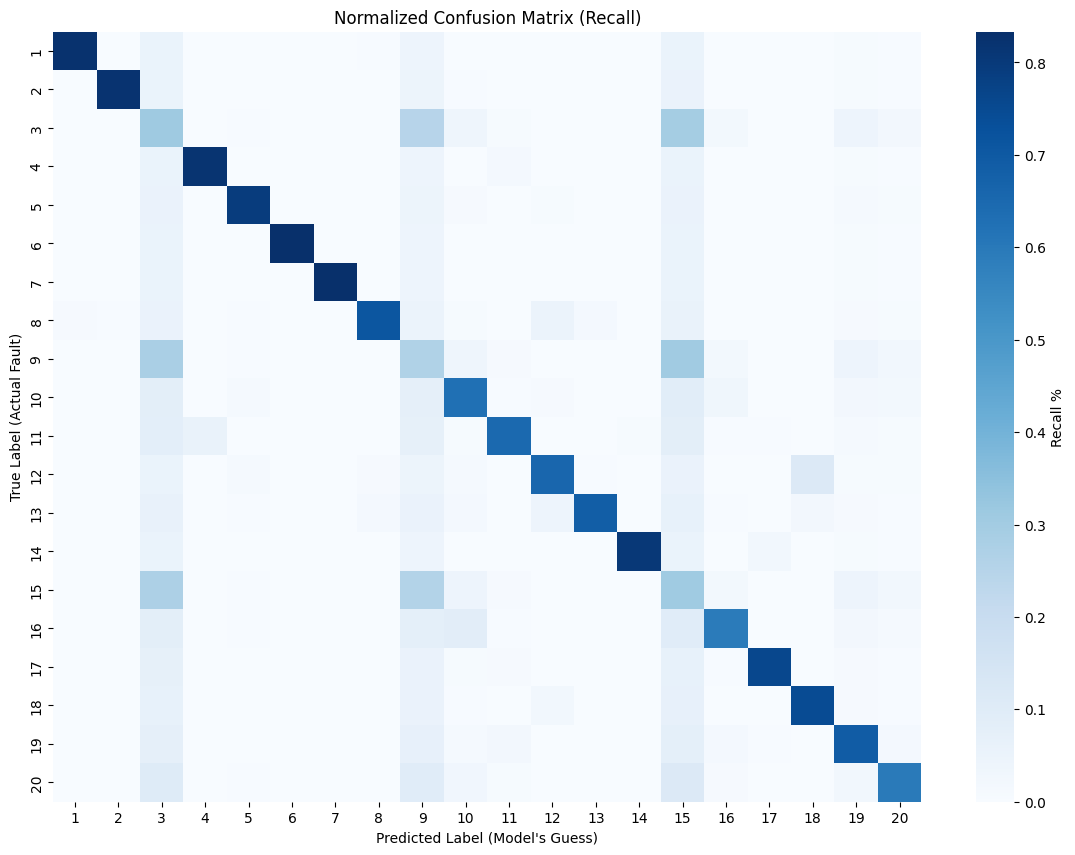

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# --- 8. Generate and Visualize Confusion Matrix ---
print("\nGenerating confusion matrix...")

# Get the list of all unique fault numbers (0-20, excluding 0 if not present)
# Using .unique() and sorting them ensures the labels match the matrix axes
class_labels = sorted(y_final_test.unique())

# 1. Calculate the confusion matrix (raw counts)
cm = confusion_matrix(y_final_test, final_predictions, labels=class_labels)

# 2. Normalize the matrix to show percentages (Recall)
# We divide each row by its sum
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# 3. Plot the normalized heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(
    cm_normalized, 
    annot=False,          # Set to False, numbers are too small to read
    fmt=".2f",            # Format (not used, but good practice)
    cmap='Blues',         # Color scheme
    xticklabels=class_labels,
    yticklabels=class_labels,
    cbar_kws={'label': 'Recall %'} # Label for the color bar
)

plt.title('Normalized Confusion Matrix (Recall)')
plt.ylabel('True Label (Actual Fault)')
plt.xlabel('Predicted Label (Model\'s Guess)')
plt.show()

### Above Confusion matrix only points out three faults 3, 9,and 15 which are suffering from misclassification. 

### The problem is that your model is already ignoring them. It's found that it can get a "good" overall accuracy (67%) by just focusing on the 17 "easy" classes. It's sacrificing the "hard" classes (3, 9, and 15) to boost its overall score. Your goal is to force the model to pay more attention to these difficult classes.

### We will add a line "class_weight = 'balanced'" to Model pipeline and retrain the model. Accuracy boost is expected at the end. 

In [37]:
# --- 4. Create a Model Pipeline (Updated) ---

print("\nCreating model pipeline with balanced class weights...")
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestClassifier(
        n_estimators=100,  # 100 trees is a good start
        random_state=42,
        n_jobs=-1,         # Use all available CPU cores
        class_weight='balanced'  # <--- ADD THIS LINE
    ))
])


Creating model pipeline with balanced class weights...


In [38]:
# --- 5. Train the Model ---
print("Training the Random Forest model... (This may take a few minutes)")
# The pipeline.fit() command automatically scales X_train and then
# trains the model on the scaled data.
pipeline.fit(X_train, y_train)
print("Model training complete.")

Training the Random Forest model... (This may take a few minutes)
Model training complete.


In [39]:
# --- 6. Evaluate on the Validation Set ---
print("\n--- Model Evaluation (on Validation Set) ---")

# The pipeline.predict() command automatically scales X_val
# using the *scaler fitted on X_train* (which is correct)
y_pred = pipeline.predict(X_val)

# Check Overall Accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f"Overall Accuracy: {accuracy * 100:.2f}%")

# IMPORTANT: Look at the per-class performance
print("\nClassification Report:")
# This report shows you the precision, recall, and f1-score for
# *each of the 21 fault classes*.
print(classification_report(y_val, y_pred))


--- Model Evaluation (on Validation Set) ---
Overall Accuracy: 74.32%

Classification Report:
              precision    recall  f1-score   support

           1       0.96      0.95      0.96      1500
           2       0.93      0.94      0.93      1500
           3       0.03      0.04      0.03      1500
           4       0.90      0.94      0.92      1500
           5       0.93      0.93      0.93      1500
           6       0.96      0.96      0.96      1500
           7       0.97      0.96      0.96      1500
           8       0.96      0.92      0.94      1500
           9       0.05      0.05      0.05      1500
          10       0.75      0.75      0.75      1500
          11       0.83      0.75      0.79      1500
          12       0.93      0.91      0.92      1500
          13       0.87      0.86      0.86      1500
          14       0.96      0.93      0.94      1500
          15       0.08      0.07      0.08      1500
          16       0.87      0.74      0

In [40]:
# --- 7. Final Test (The REAL Test) ---
print("\n--- Final Test on 'faulty_testing.csv' ---")

# Load the separate, unseen test file
df_test = pd.read_csv('faulty_testing.csv')

# Define X and y for the final test data
y_final_test = df_test['faultNumber']
X_final_test = df_test.drop(['faultNumber', 'simulationRun', 'sample'], axis=1)

# Use the *already trained* pipeline to make predictions
final_predictions = pipeline.predict(X_final_test)

# Get the final report
print("Final Classification Report (on faulty_testing.csv):")
print(classification_report(y_final_test, final_predictions))


--- Final Test on 'faulty_testing.csv' ---
Final Classification Report (on faulty_testing.csv):
              precision    recall  f1-score   support

           1       0.99      0.82      0.90    480000
           2       0.99      0.82      0.90    480000
           3       0.16      0.31      0.21    480000
           4       0.93      0.82      0.87    480000
           5       0.92      0.79      0.85    480000
           6       1.00      0.83      0.91    480000
           7       1.00      0.83      0.91    480000
           8       0.95      0.71      0.81    480000
           9       0.15      0.27      0.19    480000
          10       0.64      0.63      0.64    480000
          11       0.84      0.65      0.73    480000
          12       0.82      0.66      0.73    480000
          13       0.96      0.69      0.80    480000
          14       0.99      0.81      0.89    480000
          15       0.15      0.31      0.20    480000
          16       0.79      0.59     


Generating confusion matrix...


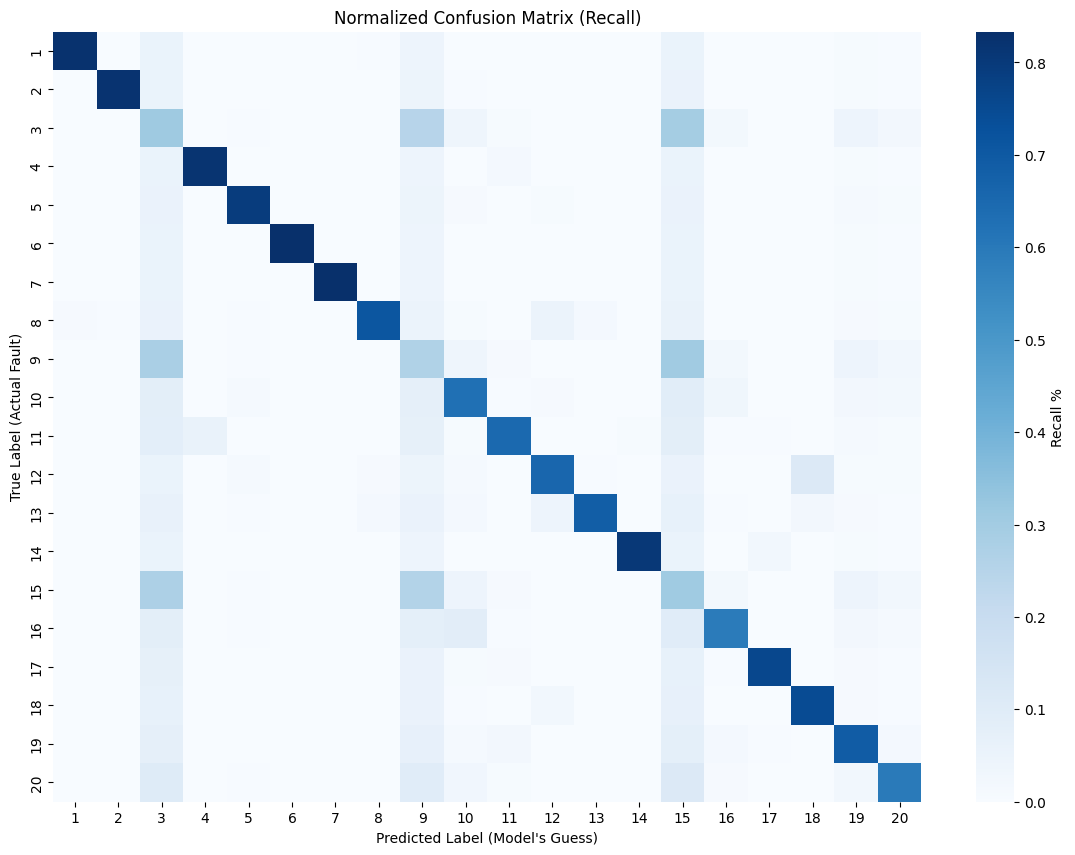

In [41]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# --- 8. Generate and Visualize Confusion Matrix ---
print("\nGenerating confusion matrix...")

# Get the list of all unique fault numbers (0-20, excluding 0 if not present)
# Using .unique() and sorting them ensures the labels match the matrix axes
class_labels = sorted(y_final_test.unique())

# 1. Calculate the confusion matrix (raw counts)
cm = confusion_matrix(y_final_test, final_predictions, labels=class_labels)

# 2. Normalize the matrix to show percentages (Recall)
# We divide each row by its sum
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# 3. Plot the normalized heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(
    cm_normalized, 
    annot=False,          # Set to False, numbers are too small to read
    fmt=".2f",            # Format (not used, but good practice)
    cmap='Blues',         # Color scheme
    xticklabels=class_labels,
    yticklabels=class_labels,
    cbar_kws={'label': 'Recall %'} # Label for the color bar
)

plt.title('Normalized Confusion Matrix (Recall)')
plt.ylabel('True Label (Actual Fault)')
plt.xlabel('Predicted Label (Model\'s Guess)')
plt.show()

### This balanced weight failed. We will try something else.